In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import ImageFolder
import torchvision.models as models
from torchvision.models import VGG16_BN_Weights
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter, saps_imagenet_real_scatter

# load pre-trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.vgg16_bn(weights=VGG16_BN_Weights.IMAGENET1K_V1).to(device)

#  Reprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=4)

model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Before temperature - NLL: 1.184, ECE: 0.025
Optimal temperature: 1.025
After temperature - NLL: 1.181, ECE: 0.025


APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9119 ± 0.0016
Final Average Prediction Set Size: 12.38 ± 0.20
Final Average Coverage: 0.8991 ± 0.0026
Final Average Real Probability: 0.8109 ± 0.0027


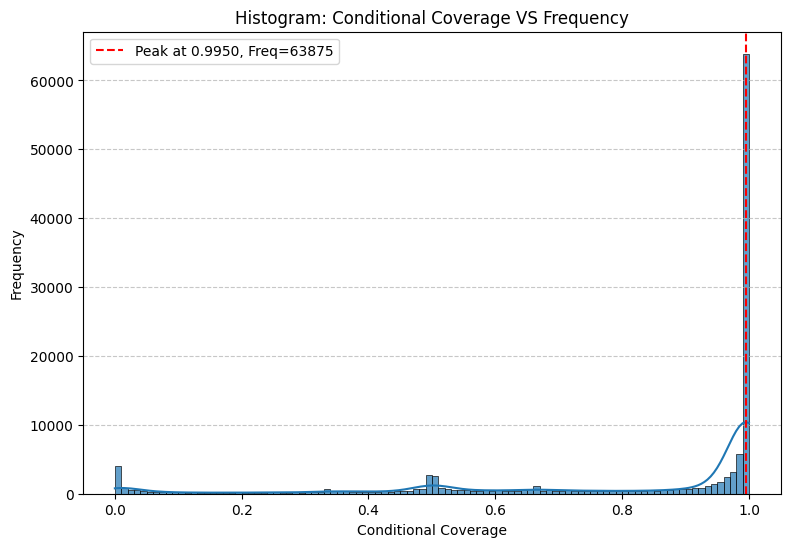

63875 (51.36%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9536 ± 0.0024
Final Average Prediction Set Size: 3.55 ± 0.03
Final Average Coverage: 0.8989 ± 0.0029
Final Average Real Probability: 0.7721 ± 0.0037


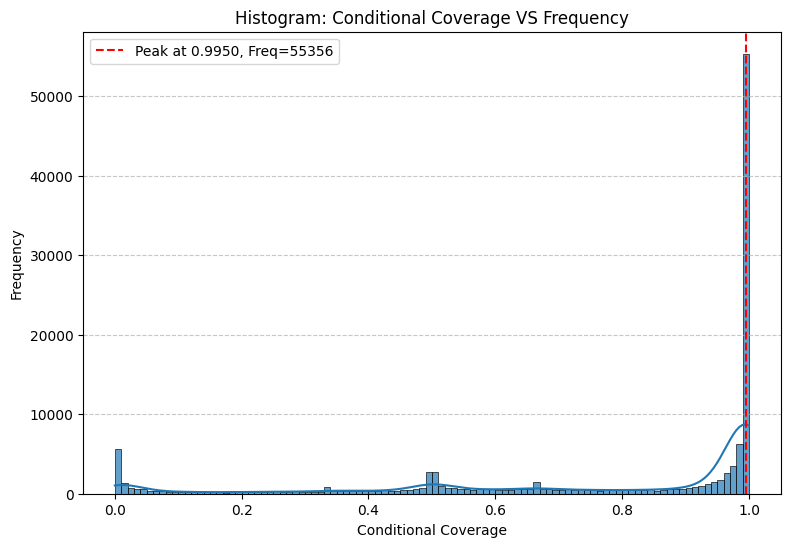

55356 (44.51%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.05, k_reg=5, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0185 ± 0.0092
Final Average Prediction Set Size: 2.87 ± 0.06
Final Average Coverage: 0.8989 ± 0.0030
Final Average Real Probability: 0.7444 ± 0.0050


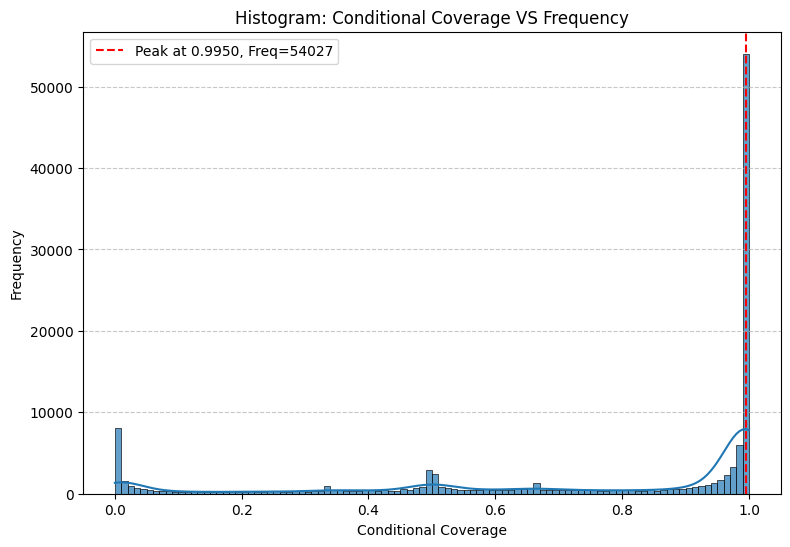

54027 (43.44%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.15, num_runs=10, alpha=0.1, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9119 ± 0.0016
Final Average Prediction Set Size: 12.38 ± 0.20
Final Average Coverage: 0.8991 ± 0.0026
Final Average Real Probability: 0.8109 ± 0.0027


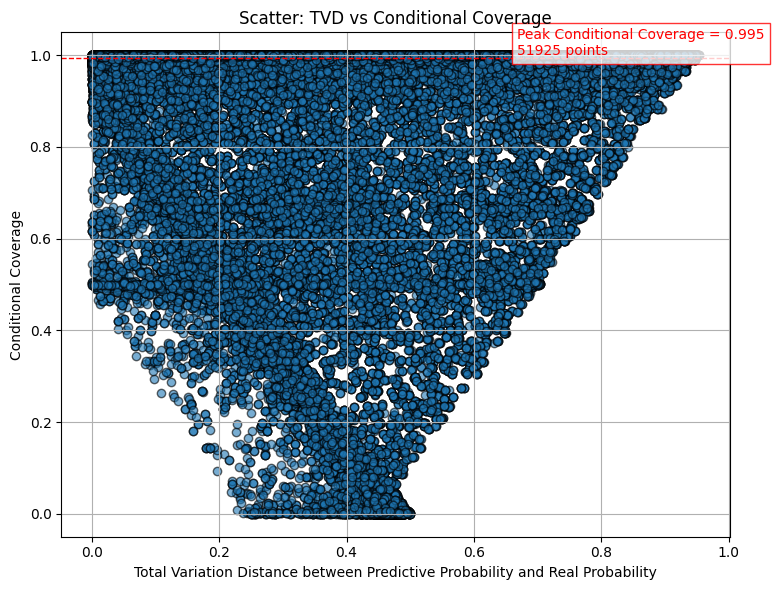

Peak Conditional Coverage = 0.995, with 51925 samples

=== Count Regions Summary ===
41483 (33.4%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
34152 (27.5%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
31735 (25.5%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.56381', '0.42942']
  Real Probability Set      : ['0.48820', '0.51154']
Sample 2:
  Predictive Probability Set: ['0.93566']
  Real Probability Set      : ['0.99965']
Sample 3:
  Predictive Probability Set: ['0.90912']
  Real Probability Set      : ['0.99825']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.62143']
  Real Probability Set      : ['0.06415']
Sample 2:
  Predictive Probability Set: ['0.53137', '0.11207', '0.10150', '0.03630', '0.02889', '0.01935', '0.00910', '0.00818', '0.00746', '0.00738', '0.00690', '0.00606', '0.00377', '0.00345', '0.00330', '

In [5]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9536 ± 0.0024
Final Average Prediction Set Size: 3.55 ± 0.03
Final Average Coverage: 0.8989 ± 0.0029
Final Average Real Probability: 0.7721 ± 0.0037


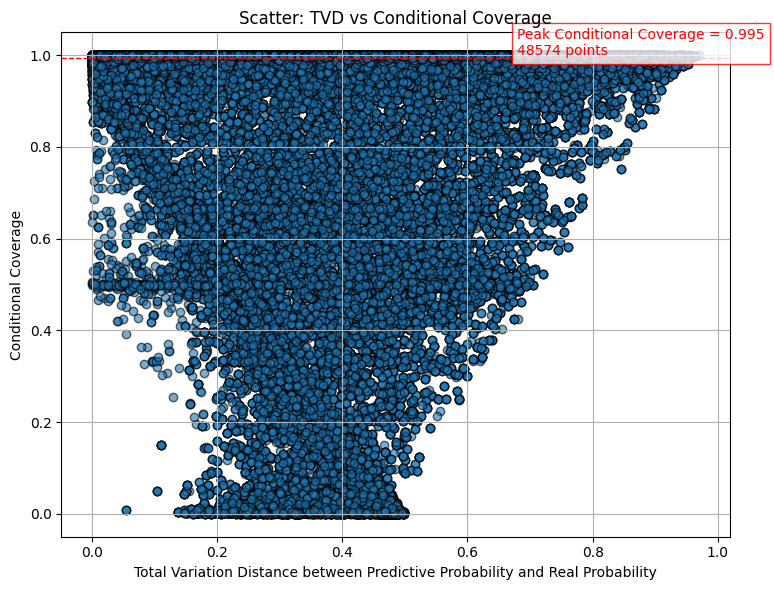

Peak Conditional Coverage = 0.995, with 48574 samples

=== Count Regions Summary ===
46150 (37.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
28392 (22.8%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
38602 (31.0%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.91991', '0.03640']
  Real Probability Set      : ['0.89968', '0.08710']
Sample 2:
  Predictive Probability Set: ['0.98235']
  Real Probability Set      : ['0.99550']
Sample 3:
  Predictive Probability Set: ['0.93120', '0.06454']
  Real Probability Set      : ['0.99673', '0.00314']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.66619', '0.29837']
  Real Probability Set      : ['0.04981', '0.02695']
Sample 2:
  Predictive Probability Set: ['0.15503', '0.07886', '0.06423', '0.04870', '0.03781', '0.03724', '0.03660', '0.03313', '0.02817', '0.02720', '0.02590', '

In [6]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, k_reg=5, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0185 ± 0.0092
Final Average Prediction Set Size: 2.87 ± 0.06
Final Average Coverage: 0.8989 ± 0.0030
Final Average Real Probability: 0.7444 ± 0.0050


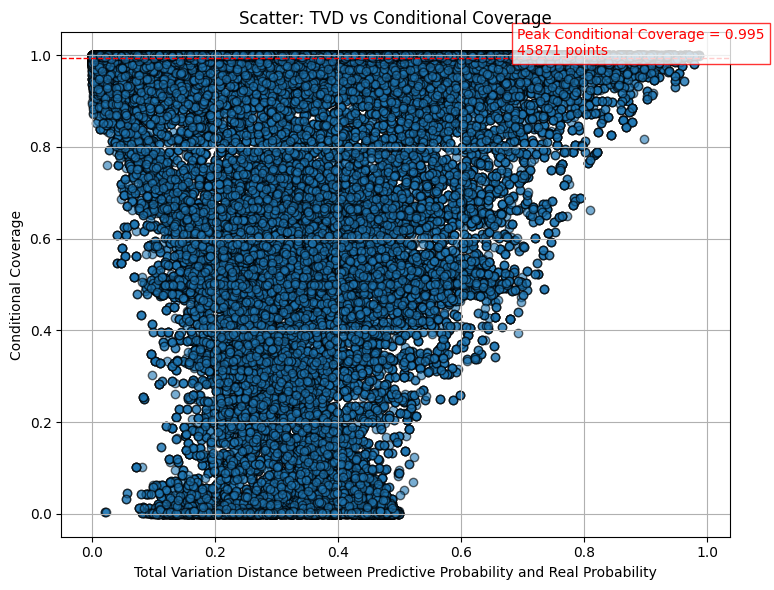

Peak Conditional Coverage = 0.995, with 45871 samples

=== Count Regions Summary ===
46697 (37.5%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
23662 (19.0%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
43625 (35.1%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.88842']
  Real Probability Set      : ['0.81158']
Sample 2:
  Predictive Probability Set: ['0.99341']
  Real Probability Set      : ['0.99065']
Sample 3:
  Predictive Probability Set: ['0.97970']
  Real Probability Set      : ['0.99792']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.53699', '0.11123', '0.06200', '0.05953']
  Real Probability Set      : ['0.00147', '0.00000', '0.00147', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.24463', '0.11420', '0.10654', '0.07450', '0.05660', '0.02863']
  Real Probability Set      : ['0.01159', '0.13329', '0.

In [7]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.15, num_runs=10, alpha=0.1)